In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score,confusion_matrix


In [3]:
df=pd.read_csv("news.csv")


C:\Users\LENOVO\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  #removing the unnamed columns

In [5]:
df.shape

(7818, 4)

In [6]:
df.head()

,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [21]:
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

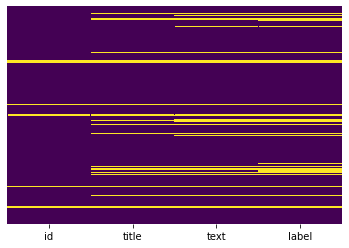

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
df.dropna(inplace=True)

In [13]:
df.isnull().count()

id       6754
title    6754
text     6754
label    6754
dtype: int64

In [14]:
df.shape

(6754, 4)

In [9]:
df[df['label']=='FAKE'].count()

id       3154
title    3154
text     3154
label    3154
dtype: int64

In [10]:
df[df['label']=='REAL'].count()

id       3161
title    3161
text     3161
label    3161
dtype: int64

In [22]:
#split train and test
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [23]:
#Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)


In [24]:
#Fit and transform train set
tfidf_train=tfidf_vectorizer.fit_transform(x_train.values.astype('U'))   #convert type to unicode


In [25]:
#transform test set
tfidf_test=tfidf_vectorizer.transform(x_test.values.astype('U'))

In [26]:
y_train=y_train.values.astype('U')

In [27]:
#Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(C=0.9, max_iter=50)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(C=0.9, max_iter=50)

In [28]:
y_test=y_test.astype('U')

In [29]:
#Predict on the test set
y_pred=pac.predict(tfidf_test)


In [30]:
print(y_test)

3510     FAKE
2740     FAKE
1249     FAKE
4087     etc.
4483     FAKE
        ...  
2584     FAKE
7183     REAL
7738     FAKE
5511     REAL
1647     REAL
Name: label, Length: 1351, dtype: object


In [31]:
#calculate accuracy
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 87.05%


In [32]:
#Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[592,  31],
       [ 46, 583]], dtype=int64)